
## Importing Library

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns



## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")



### Data Cleaning 

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#fixing column names for convenience reason
df.rename(columns= lambda x:x.strip().lower().replace(" ","_"),inplace=True)

In [5]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
#checking null
df.isnull().sum()

patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no-show           0
dtype: int64

In [7]:
#check duplicate
df.duplicated().sum()

0

In [8]:
#check datatype
df.dtypes

patientid         float64
appointmentid       int64
gender             object
scheduledday       object
appointmentday     object
age                 int64
neighbourhood      object
scholarship         int64
hipertension        int64
diabetes            int64
alcoholism          int64
handcap             int64
sms_received        int64
no-show            object
dtype: object

In [9]:
def parse_date(date):
    if date == "":
        return None
    else:
        return datetime.strptime(date,'%Y-%m-%dT%H:%M:%S%fZ')

def parse_maybe_int(i):
    if i=="":
        return None
    else:
        return int(i)

# Please check at least the following aspects in your data set:

• Remove unused columns.
• Remove duplicate rows.
• Change data formats (date columns)
• Discard rows having zero in columns.
• Remove outliers.

## Removing Zero in rows columns

In [10]:
df.dropna(inplace=True)

## Remove Duplicate

In [11]:
df.drop_duplicates(inplace=True)

## Removing Unused columns

In [12]:
df.drop(columns=['patientid','appointmentid','neighbourhood'],inplace=True)

In [13]:
df["appointmentday"] = df["appointmentday"].apply(parse_date)
df["scheduledday"] = df["scheduledday"].apply(parse_date)

In [14]:
df.dtypes

gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                        int64
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
no-show                   object
dtype: object

## Encoding No-show

In [15]:
#encoding no-show
df['no-show'] = np.where(df["no-show"]=="Yes",1,0)

In [16]:
df_no = df[df["no-show"]==0]

In [17]:
df_yes = df[df["no-show"]!=0]

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Q1 What Features that most important that determine patient showing

In [18]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 11 columns):
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no-show           110527 non-null int64
dtypes: datetime64[ns](2), int64(8), object(1)
memory usage: 10.1+ MB


In [20]:
count = df['no-show'].value_counts()

Text(0.5,1,'Checking Data Balance')

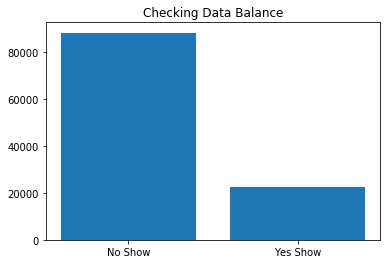

In [21]:
plt.bar(["No Show","Yes Show"],count)
plt.title("Checking Data Balance")

In [22]:
gender_no_show = df_no.groupby("gender")['no-show'].count()

In [23]:
gender_no_show

gender
F    57246
M    30962
Name: no-show, dtype: int64

Text(0,0.5,'Female')

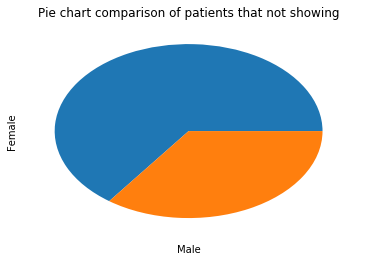

In [24]:
plt.pie(gender_no_show)
plt.title("Pie chart comparison of patients that not showing")
plt.xlabel("Male")
plt.ylabel("Female")

From pie chart above I conclude that: - Patients that not show up mostly are Women

In [25]:
numeric_features = df.dtypes[df.dtypes ==int].index

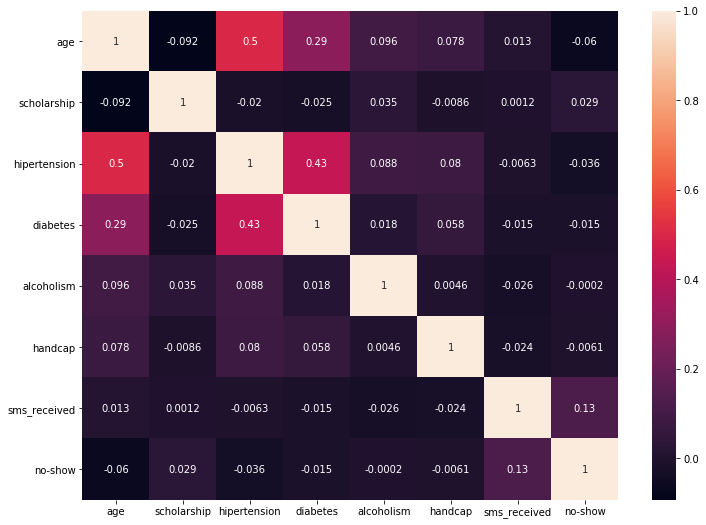

In [26]:
corrmat = df[numeric_features].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,annot=True)

In [27]:
scholarship_noshow_count = df_no.scholarship.value_counts()

Text(0.5,1,'Comparison Yes Show Patients based on Scholarship')

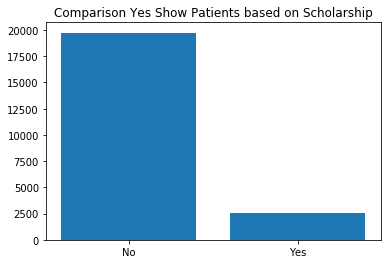

In [29]:
yesshow_scholarship = df_yes.scholarship.value_counts()
plt.bar(["No","Yes"],yesshow_scholarship)
plt.title("Comparison Yes Show Patients based on Scholarship")

from the bar chart above I conclude that: - More patients come that don't have scholarships rather than who have

In [30]:
feature_no_show_mean = df_no.groupby("no-show").mean()
feature_yes_show_mean = df_yes.groupby("no-show").mean()

In [31]:
sms_mean = df.groupby("no-show").sms_received.mean()

Text(0.5,1,'Mean differences between sms received yes show and no show')

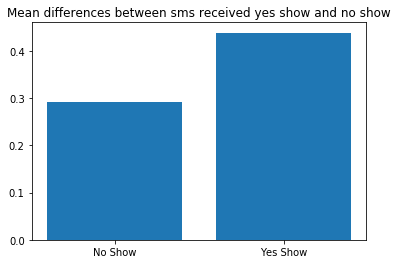

In [32]:
plt.bar(["No Show","Yes Show"],sms_mean) 
plt.title("Mean differences between sms received yes show and no show")

From bar chart above I can see that:
-more patients come when they received sms

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Line Chart Age vs Diabetes based on gender')

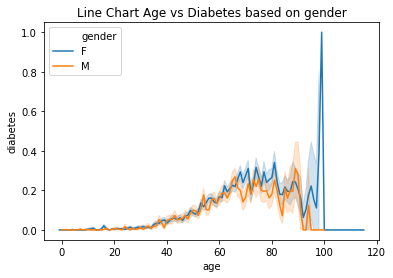

In [36]:
sns.lineplot(x = "age",y ="diabetes" ,hue = "gender",data = df)
plt.title("Line Chart Age vs Diabetes based on gender")

This line chart is showing the difference between gender in term of age and diabetes
And I can see that:
- more female patients has diabetes than men

# Conclusion

Based on data, observation can be made:
- Many female patients suffer from diabetes than male patients
- There are more female patients than male patients
- Receive sms or not correlate to whether patients come or not
- Scholarship not really affected whether patients come or not


Limitation:

- imbalanced data
- it would be good to know the distance between clinic to neighbourhood
